#Libraries
Import necessary libraries

In [56]:
#Libraries

import numpy as np
import pandas as pd
from skimage import io
from skimage import io, exposure
from skimage import util
from pandas.io.formats.excel import ExcelFormatter
from openpyxl import Workbook
import os
import random

from google.colab import drive


#Input data

Before code execution, import folder containing images and prepared excel file to your Google Drive. Then, fill in following data:

- **root_path** - path to folder where all data (image folder and excel file) will be stored.
- **sample_code** - will be further used as excel spreadsheet name. If declared sample code already exists as sheet name in excel file, the data will be replaced;
- **image_folder** - replace text in quotation mark with folder name preceded by "/".
- **excel_file** - replace text in quotation mark with file name including file extension preceded by "/".  

In [57]:
#Input and output path
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab Notebooks'

sample_code = "AT13-1"
image_folder = root_path + r"/AT13-SEM"

excel_file = root_path + "/porosity_drive.xlsx"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Settings

Firstly, random file from specified folder will be displayed to enable adjustment of cropping, contrast and treshold settings.

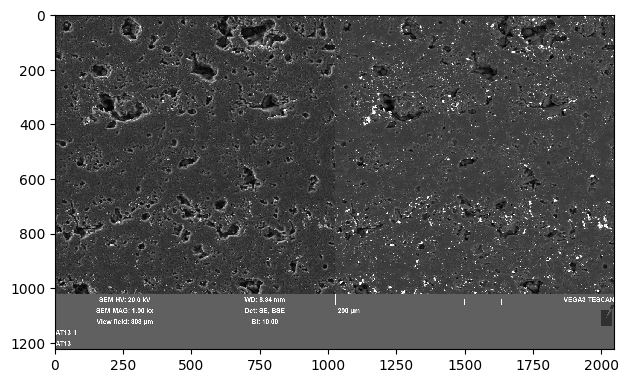

In [58]:
#Show random image

random_file = random.choice(os.listdir(image_folder))
rnd_image = io.imread(image_folder + r"/" + random_file)

io.imshow(rnd_image)

## Choose side

Choose side of the image that further will be proceed. To complete,
"***right***" or "***left***" in the first line below.

Remember about quotation marks. In case of typo, left side of the image will be choosed.

To display cropped image, remove # from the last line.

In [59]:
#Choose image side

side = "right"
x = 1024 if side=="right" else 0

rnd_image_cropped = rnd_image[0:1024, x:x+1024]

#io.imshow(rnd_image_cropped)

##Contrast

Contrast and exposure can be changed by changing cutoff and gain values.

Default values:
```
cutoff_value = 0.5
gain_value = 5
```

Recommended values:
```
cutoff_value = 0.2
gain_value = 30
```



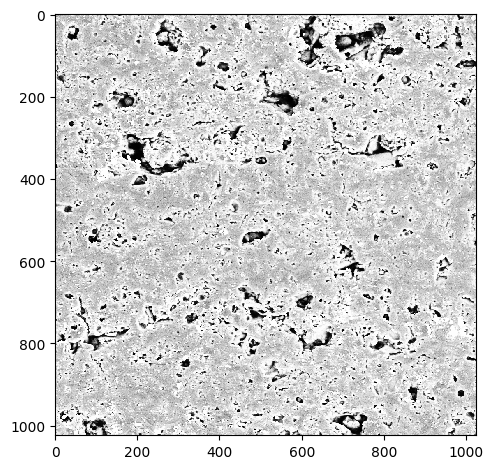

In [60]:
#Contrast settings

cutoff_value = 0.2
gain_value = 30

rnd_image_corrected = exposure.adjust_sigmoid(rnd_image_cropped, cutoff=cutoff_value, gain=gain_value, inv=False)

io.imshow(rnd_image_corrected)



## Treshold
Treshold defines the level of darkness representing pores. The values range from 0 to 1 where 0 represents none and 1 implies any level.


Recommended range: 0.05 - 0.2

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


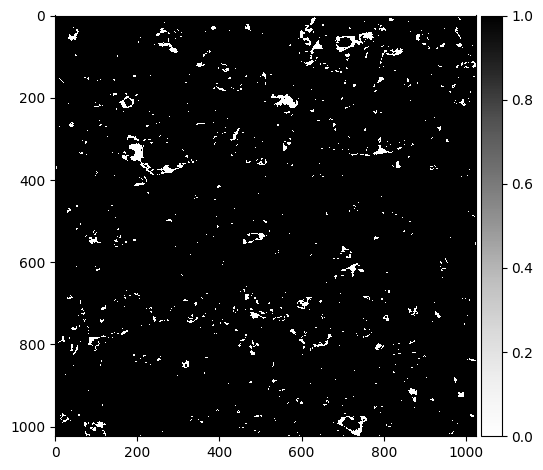

In [65]:
#Binary image - treshold

treshold = 0.1

rnd_binary_image = ((rnd_image_corrected/255)>=treshold).astype(int)
io.imshow(rnd_binary_image,cmap="Greys")


#Porosity measurement

Now, using above declared settings, porosity measurement will be executed on all images from specified folder.

In [62]:

#Function

def porosity(input_path):
    input_image = io.imread(image_folder + r"/" + input_path)

    cropped_image = input_image[0:1024, x:x+1024]

    corrected_image = exposure.adjust_sigmoid(cropped_image, cutoff=cutoff_value, gain=gain_value, inv=False)
    binary_image = ((corrected_image/255)>=treshold).astype(int)

    porosity = binary_image.size - binary_image.sum()
    porosity_percentage = (porosity/binary_image.sum())*100

    return porosity_percentage



In [63]:
#Results

results = []
for image in os.listdir(image_folder):
    porosity(image)
    p = porosity(image)
    results.append([image,p])

df= pd.DataFrame.from_records(results, columns=["sample_code", "porosity"])

mean = df["porosity"].mean()
stdev = df["porosity"].std()
print("Mean:",mean,"σ:", stdev)

Mean: 3.3995416452102956 σ: 0.5418514221741392


##Data export

Collected data will be saved in excel file with average and standard deviation included. Mean value and standard deviation σ will be printed. To display all data, remove "#" from the last line.

In [64]:
#Data

results.append([image,p, mean, stdev])
df2= pd.DataFrame.from_records(results, columns=["sample_code", "porosity", "mean", "stdev"])


with pd.ExcelWriter(excel_file, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    df2.to_excel(writer, sheet_name=sample_code)


#df2
